# MFCC特征

| https://mp.weixin.qq.com/s?__biz=MzkzODUxNjY2OA==&mid=2247484551&idx=1&sn=df20233f522e0f1f33ea077b18c7c87f&chksm=c396c71c172c187447dcdee65c9bdeca00660202a398e8341da56071481328b38a34a71bcf0c#rd

(2046, 640)
(2046, 640)
(2046, 321)
(2046, 40)
[-1.19375909e+02 -3.71815463e-02  8.56975608e-01  7.43034526e-03
  5.51632294e-01  3.34308078e-01 -2.10741461e-02 -1.18093054e-01
 -6.48751001e-01  3.17095417e-02 -3.10680738e-01  3.12920901e-01
  7.67790458e-01 -3.58846120e-01  5.06653192e-01  1.56032117e-01
 -1.23770064e-01 -7.03438255e-02 -5.87458615e-01 -1.75408569e-01
 -9.59367235e-02 -1.29838882e+00  1.54027917e-01  3.52476605e-01
  7.11933166e-01  6.81106869e-01  2.31757377e-01 -1.04426590e+00
 -1.39386725e+00 -4.74569127e-01  4.17782000e-01 -1.70464793e-01
 -3.44652176e-01  2.66303752e-02 -5.47767747e-01 -1.34106445e-02
  7.36698499e-02 -4.93374782e-01 -7.07181447e-01 -1.05346590e-01]


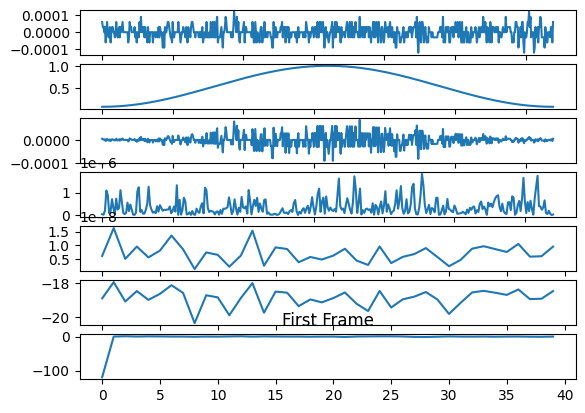

In [9]:
import numpy as np
import librosa
import scipy
import scipy.fftpack

# 读取音频文件
y, sr = librosa.load('home_before.wav', sr=None)

# 设置帧长度和帧移
frame_length = int(sr * 0.02) # 20ms
hop_length = int(sr * 0.01) # 10ms

# 使用librosa的framesig函数进行分帧
frames = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length).T

# 打印分帧后的信号
print(frames.shape) # (num_frames, frame_length)
# print(frames)

# 选择窗函数
window = np.hamming(frame_length)

# 对每个帧应用窗函数
windowed_frames = frames * window
print(windowed_frames.shape)

# 计算每个帧的FFT
fft_frames = np.fft.rfft(windowed_frames, axis=1)

# 计算功率谱
power_spectrum = np.abs(fft_frames) ** 2
print(power_spectrum.shape)

# 创建梅尔滤波器组
n_mels = 40
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=frame_length, n_mels=n_mels)

# 应用梅尔滤波器组能量
mel_energies = np.dot(power_spectrum, mel_filter_bank.T)
print(mel_energies.shape)

# 对能量取对数
log_mel_energies = np.log(mel_energies + 1e-10)

# 应用DCT
mfccs = scipy.fftpack.dct(log_mel_energies, type=2, axis=1, norm='ortho')
print(mfccs[0])

# 可视化
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 1)

axes[0].plot(frames[0])
axes[1].plot(window)
axes[2].plot(windowed_frames[0])
axes[3].plot(power_spectrum[0])
axes[4].plot(mel_energies[0])
axes[5].plot(log_mel_energies[0])
axes[6].plot(mfccs[0])

plt.title('First Frame')
plt.show()


# BFCC